# Making Heat Maps In R: A Comparison

Amanda Birmingham, [CCBB](http://www.ccbb.bio/), [UCSD](http://www.ucsd.edu/) (abirmingham at ucsd.edu)

[Heat maps](https://en.wikipedia.org/wiki/Heat_map) are a staple of data visualization for many tasks, including differential expression analyses on microarray and RNA-Seq data.  Many people have already written heat-map-plotting packages for R, so it takes a little effort to decide which to use; here I investigate the performance of the six that I found referenced most frequently online.

My main goals ([YMMV](https://en.wiktionary.org/wiki/your_mileage_may_vary)) beyond basic plotting were to be able to (1) annotate rows and columns with metadata information, (b) include scales and labels in the figure itself (since often figures are reused in presentations/etc without caption information), and (c) do as much label customization as possible with the shallowest learning curve. I also want automatic dendrogram creation, so rolling my own using ggplot2/etc was out.  Note that throughout I have accepted the default colors for every heat map tool, as these are pretty easy to change after the fact if one cares.

**TL;DR**: I recommend using **heatmap.2** if you want *simple and easy*, and **heatmap3** (**NB**: not "heatmap.3") if you want more *fine-grained control*.  Both use the same interface so moving from the first to the second if needed should be relatively painless.

<a name = "table-of-contents"></a>

## Table of Contents

* [Set-Up](#set-up)
* [heatmap](#heatmap)
* [heatmap.2](#heatmap-2)
* [aheatmap](#aheatmap)
* [pheatmap](#pheatmap)
* [heatmap3](#heatmap3)
* [annHeatmap2](#annheatmap2)
* [Summary](#summary)
* [Recommendation](#recommendation)

[Table of Contents](#table-of-contents)
    
<a name = "set-up"></a>

## Set-Up

Note that this is an *R-kernel* Jupyter notebook, which will only be runnable on your notebook server if you have the [R kernel](https://github.com/IRkernel/IRkernel) installed.

<br />
<div class = "alert-info">
<strong>The two test files below must be in the same directory as this notebook before running it.</strong> If you download the entire "Making Heat Maps In R" folder from GitHub, they will come with it, or you can download them manually from the links below:<br />
<br />
<a href = "heatmap_test_matrix.txt">heatmap_test_matrix.txt</a><br />
<a href = "heatmap_test_annotation.txt">heatmap_test_annotation.txt</a><br />
<br />
All test "data" used here are just random numbers :)
</div>

In [1]:
# This line prevents SVG output, which does not play well with export to HTML
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

In [2]:
# Load the example "data"
gLogCpmData = as.matrix(read.table("heatmap_test_matrix.txt"))
gLogCpmData

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,⋯,Sample47,Sample48,Sample49,Sample50,Sample51,Sample52,Sample53,Sample54,Sample55,Sample56
GeneA,30,67,34,98,32,3,79,15,6,18,,97,49,12,6,87,58,55,13,48,28
GeneB,80,70,28,51,74,76,85,98,7,64,,45,69,1,9,8,49,97,5,83,66
GeneC,43,36,41,24,71,76,91,50,81,57,,21,10,75,35,77,92,85,73,97,12
GeneD,88,66,57,8,11,91,71,84,89,63,,12,16,61,42,48,96,26,84,75,78
GeneE,90,57,73,51,86,32,22,78,84,31,,37,40,1,37,74,79,89,79,68,42
GeneF,31,87,65,36,64,15,28,89,94,58,,58,32,11,18,81,47,27,60,79,91
GeneG,1,93,70,64,98,28,65,96,83,2,,51,83,99,3,37,54,6,22,56,19
GeneH,27,18,37,85,59,61,85,3,16,7,,38,14,22,66,100,14,99,37,39,51
GeneI,85,35,24,73,21,25,45,80,20,94,,34,10,59,40,100,32,40,11,32,4
GeneK,16,55,76,60,40,48,85,90,24,44,,66,53,91,23,90,48,61,56,47,74


In [3]:
# Load the example annotation/metadata
gAnnotationData = read.table("heatmap_test_annotation.txt")
gAnnotationData

,sample_name,subject_drug
1,Sample1,MiracleDrugA
2,Sample2,MiracleDrugA
3,Sample3,MiracleDrugA
4,Sample4,MiracleDrugA
5,Sample5,MiracleDrugB
6,Sample6,MiracleDrugB
7,Sample7,MiracleDrugB
8,Sample8,MiracleDrugB
9,Sample9,MiracleDrugB
10,Sample10,MiracleDrugB


In [4]:
# Make helper function to map metadata category to color
mapDrugToColor<-function(annotations){
    colorsVector = ifelse(annotations["subject_drug"]=="MiracleDrugA", 
        "blue", ifelse(annotations["subject_drug"]=="MiracleDrugB", 
        "green", "red"))
    return(colorsVector)
}

[Table of Contents](#table-of-contents)

<a name = "heatmap"></a>

### heatmap

[heatmap](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/heatmap.html) is the built-in option for heat maps in R:

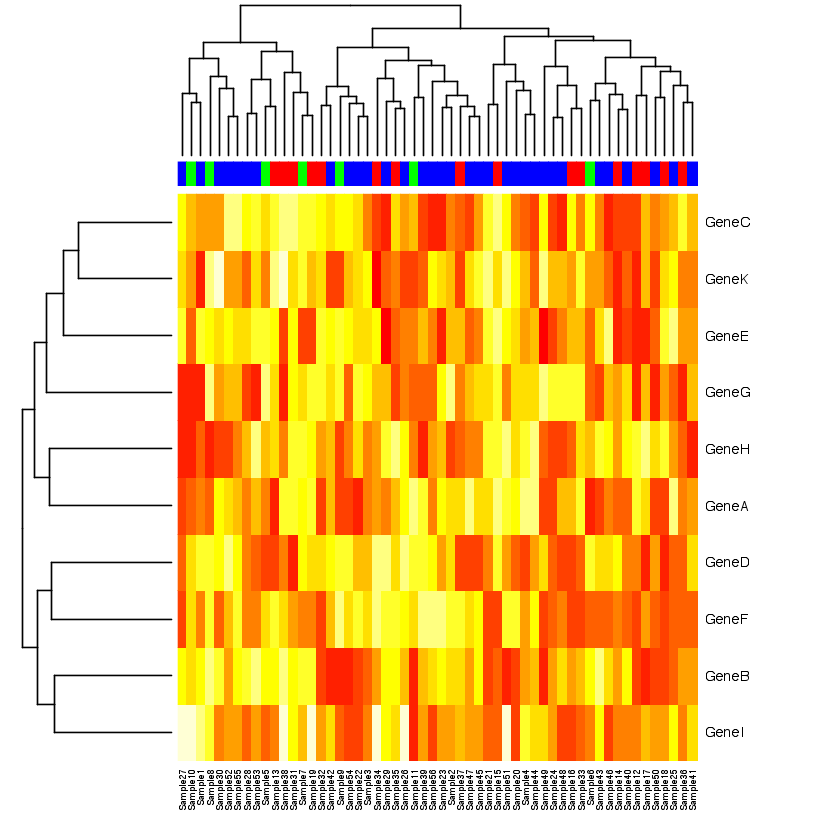

In [5]:
# Test heatmap with column annotations
testHeatmap<-function(logCPM, annotations) {    
    sampleColors = mapDrugToColor(annotations)
    heatmap(logCPM, margins=c(5,8), ColSideColors=sampleColors)
}

testHeatmap(gLogCpmData, gAnnotationData)

Not bad, but there are no legends for either the main or annotation information ...

[Table of Contents](#table-of-contents)

<a name = "heatmap-2"></a>

### heatmap.2

[heatmap.2](http://www.rdocumentation.org/packages/gplots/versions/3.0.1/topics/heatmap.2) is an "enhanced" heat map function from the add-on package [gplots](https://cran.r-project.org/web/packages/gplots/gplots.pdf):

In [6]:
install.packages("gplots")


The downloaded binary packages are in
	/var/folders/hn/rpn4rhms41v939mg20d7w0dh0000gn/T//RtmpjRP53o/downloaded_packages



Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



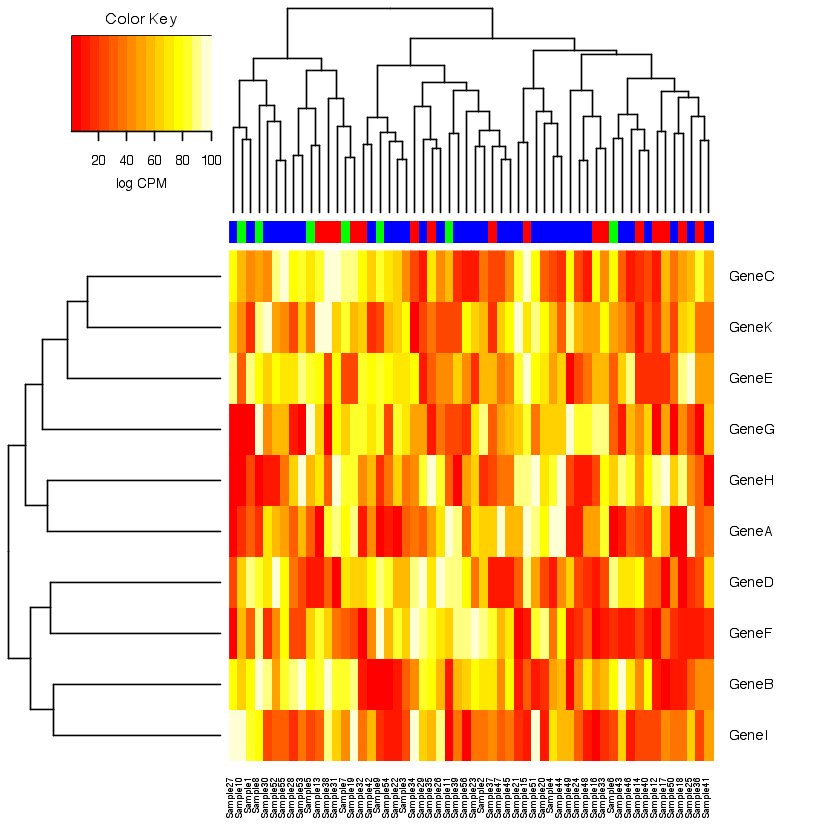

In [7]:
library(gplots)

# Test heatmap.2 with column annotations and custom legend text
testHeatmap2<-function(logCPM, annotations) {    
    sampleColors = mapDrugToColor(annotations)
    heatmap.2(logCPM, margins=c(5,8), ColSideColors=sampleColors,
        key.xlab="log CPM",
        key=TRUE, symkey=FALSE, density.info="none", trace="none")
}

testHeatmap2(gLogCpmData, gAnnotationData)

I turned off a few of the default options (density.info, trace) to make the graphic a bit less busy.  The default main legend is nice, but I don't see an option to include a legend for the annotation information.

[Table of Contents](#table-of-contents)

<a name = "aheatmap"></a>

### aheatmap

[aheatmap](https://renozao.github.io/NMF/devel/vignettes/aheatmaps.pdf), which stands for "annotated heatmap", is a heat map plotting function from the [NMF](http://cran.at.r-project.org/web/packages/NMF/NMF.pdf) package:

In [8]:
install.packages("NMF")


The downloaded binary packages are in
	/var/folders/hn/rpn4rhms41v939mg20d7w0dh0000gn/T//RtmpjRP53o/downloaded_packages


Loading required package: pkgmaker
Loading required package: registry

Attaching package: 'pkgmaker'

The following object is masked from 'package:base':

    isNamespaceLoaded

Loading required package: rngtools
Loading required package: cluster
NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 3/4
  To enable shared memory capabilities, try: install.extras('
NMF
')


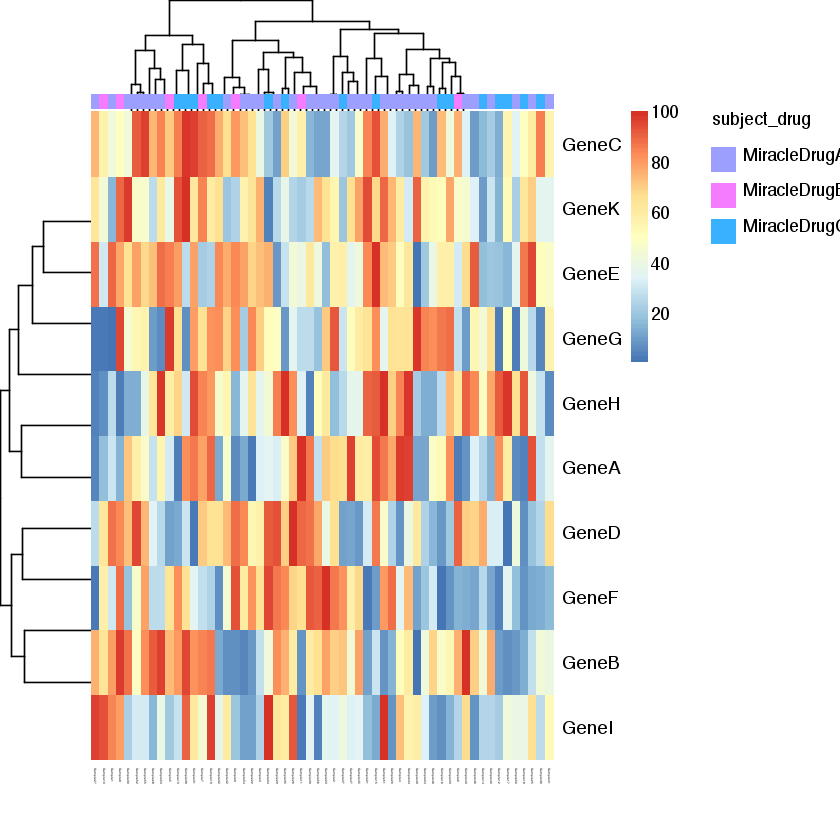

In [9]:
library(NMF)

# Test aheatmap with column annotations
testAheatmap<-function(logCPM, annotations) {    
    aheatmap(logCPM, annCol=annotations[
        "subject_drug"])
}

testAheatmap(gLogCpmData, gAnnotationData)

Yay, legends for both the main data and the annotations!  However, note that something weird is going on here: **The dendrograms aren't showing up right**.  It appears that somehow the body of the heatmap is overlapping with the finer levels of the dendrograms at both top and left.  There may be a way to fix this by digging further into the settings of aheatmap, but since I'm looking for something easy to use out-of-the-box, I consider this a disqualifier for my usage.

[Table of Contents](#table-of-contents)

<a name = "pheatmap"></a>

### pheatmap

pheatmap, where the "p" stands for "pretty", is the sole function of the package [pheatmap](https://cran.r-project.org/web/packages/pheatmap/pheatmap.pdf):

In [10]:
install.packages("pheatmap")


The downloaded binary packages are in
	/var/folders/hn/rpn4rhms41v939mg20d7w0dh0000gn/T//RtmpjRP53o/downloaded_packages


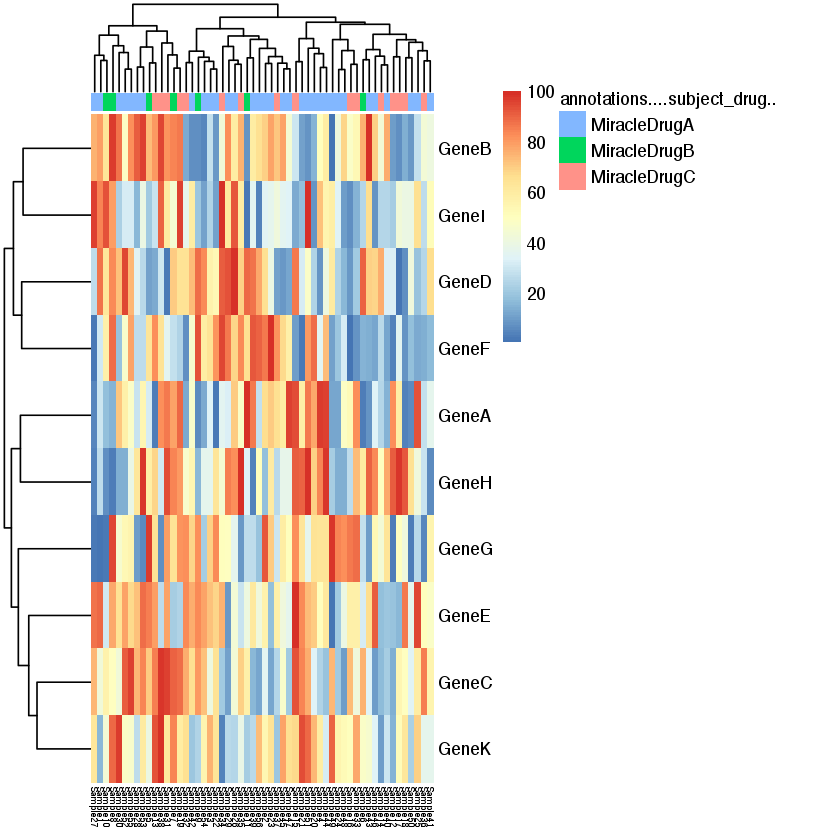

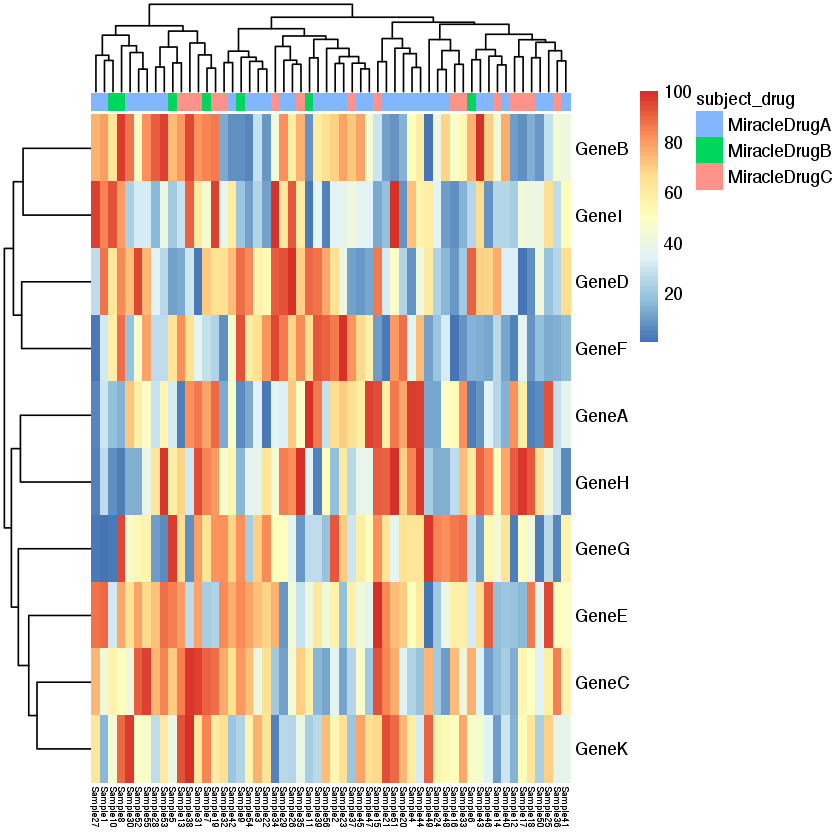

In [11]:
library(pheatmap)

# Test pheatmap with two annotation options
testPheatmap<-function(logCPM, annotations) {    
    drug_info = data.frame(annotations[,"subject_drug"])
    rownames(drug_info) = annotations[["sample_name"]]
    
    # Assign the column annotation straight from 
    # the input annotation dataframe
    pheatmap(logCPM, annotation_col=drug_info, 
        annotation_names_row=FALSE,
        annotation_names_col=FALSE,
        fontsize_col=5)
    
    # Assign the column annotation to an intermediate
    # variable first in order to change the name 
    # pheatmap uses for its legend
    subject_drug = annotations[["subject_drug"]]
    drug_df = data.frame(subject_drug)
    rownames(drug_df) = annotations[["sample_name"]]
    
    pheatmap(logCPM, annotation_col=drug_df, 
        annotation_names_row=FALSE,
        annotation_names_col=FALSE,
        fontsize_col=5)
}
testPheatmap(gLogCpmData, gAnnotationData)

Again, nice to have legends for both main and annotation information.  Note that:
1. One controls the annotation legend title through the variable name, which I consider suboptimal as variable names often do not read nicely as English text.
2. The function uses row names to match annotations to data, so all data and annotations must be contained in dataframes (not matrices).

[Table of Contents](#table-of-contents)

<a name = "heatmap3"></a>

### heatmap3

[heatmap3](http://www.rdocumentation.org/packages/heatmap3/versions/1.1.1/topics/heatmap3) is the central function  of the [heatmap3](https://cran.r-project.org/web/packages/heatmap3/heatmap3.pdf) package.  Beware that this is different from "heatmap.3", of which there are numerous versions (e.g., [here](https://cran.r-project.org/web/packages/GMD/vignettes/GMD-vignette.pdf), [here](https://gist.github.com/nachocab/3853004), and [here](https://gist.github.com/tleja/7783150)--apparently a lot of people felt heatmap.2 needed an upgrade! I don't investigate these others here because I haven't seen them discussed online by users very often.)

In [12]:
install.packages("heatmap3")


The downloaded binary packages are in
	/var/folders/hn/rpn4rhms41v939mg20d7w0dh0000gn/T//RtmpjRP53o/downloaded_packages


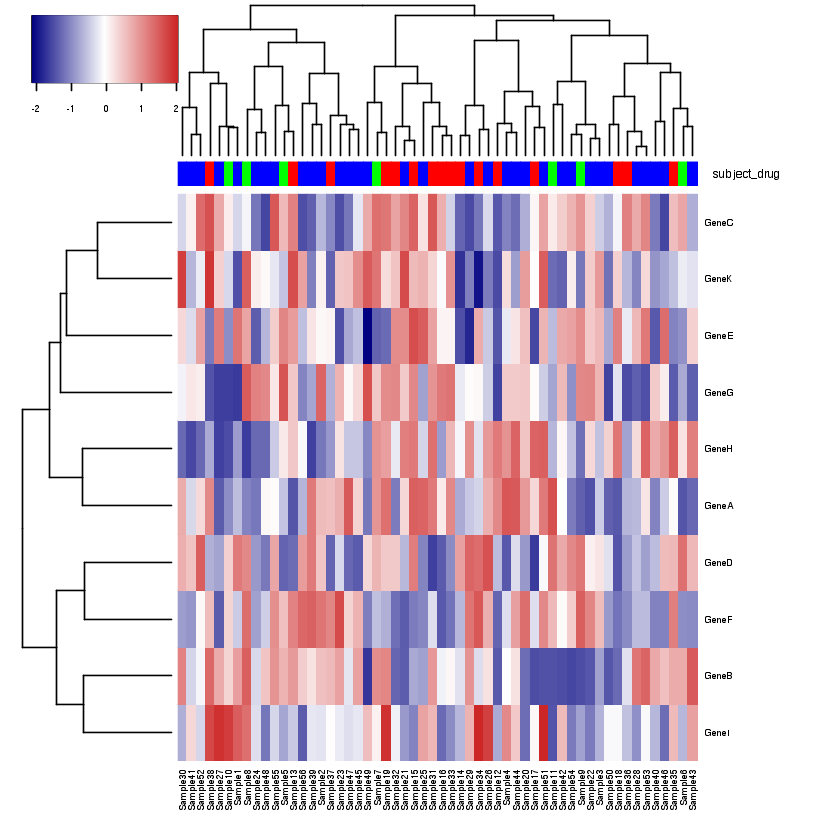

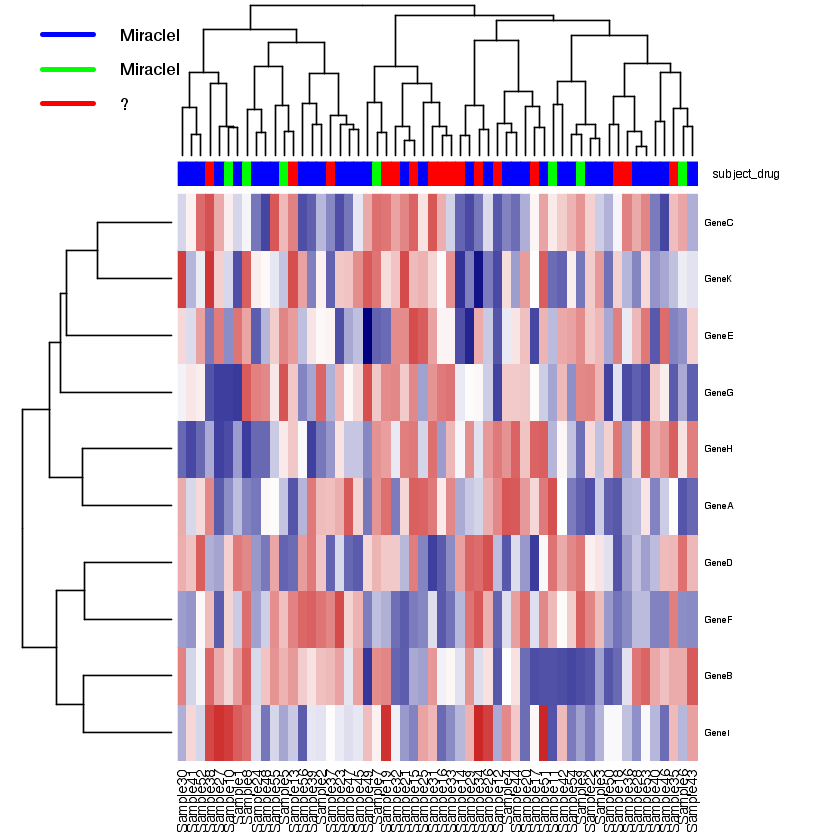

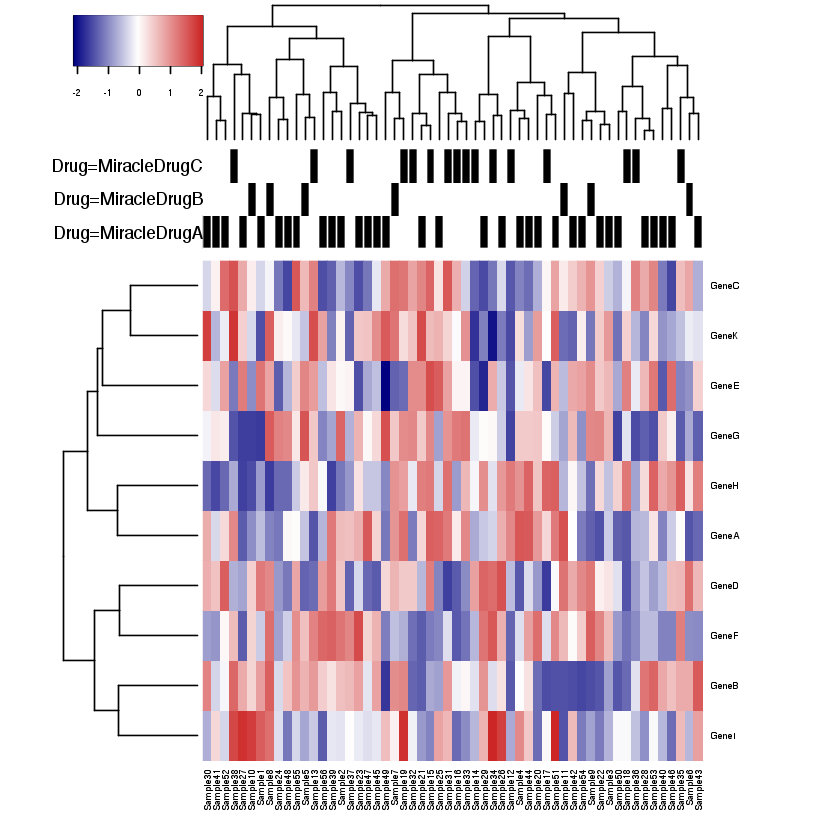

In [13]:
library(heatmap3)

# Test heatmap3 with several annotation options
testHeatmap3<-function(logCPM, annotations) {    
    sampleColors = mapDrugToColor(annotations)
    
    # Assign just column annotations
    heatmap3(logCPM, margins=c(5,8), ColSideColors=sampleColors) 
    
    # Assign column annotations and make a custom legend for them
    heatmap3(logCPM, margins=c(5,8), ColSideColors=sampleColors, 
        legendfun=function()showLegend(legend=c("MiracleDrugA", 
        "MiracleDrugB", "?"), col=c("blue", "green", "red"), cex=1.5))
    
    # Assign column annotations as a mini-graph instead of colors,
    # and use the built-in labeling for them
    ColSideAnn<-data.frame(Drug=annotations[["subject_drug"]])
    heatmap3(logCPM,ColSideAnn=ColSideAnn,
        ColSideFun=function(x)showAnn(x),
        ColSideWidth=0.8)
}
             
testHeatmap3(gLogCpmData, gAnnotationData)

This one follows the syntax of heatmap.2, which is good if one already knows the latter.  But it is quite complicated ... definitely complicated enough to get me into trouble (e.g., in the second option above, my annotation legend runs into my heat map and I've lost the main legend).  It may also be complicated enough to get me *out* of trouble again (e.g., via explicit setting of the legend and/or heat map placement) but it would clearly take more digging.

[Table of Contents](#table-of-contents)

<a name = "annheatmap2"></a>

### annHeatmap2

[annHeatmap2](http://www.rdocumentation.org/packages/Heatplus/versions/2.18.0/topics/annHeatmap2) is the core function of the [Heatplus](https://bioconductor.org/packages/release/bioc/manuals/Heatplus/man/Heatplus.pdf) package.  Unlike other packages discussed in this evaluation, Heatplus is available through the [bioconductor](https://www.bioconductor.org/) bioinformatics software project rather than through [CRAN](https://cran.r-project.org/).

In [14]:
# Source bioconductor
source("http://bioconductor.org/biocLite.R")
biocLite("Heatplus")

Bioconductor version 3.3 (BiocInstaller 1.22.3), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.3 (BiocInstaller 1.22.3), R 3.3.0 (2016-05-03).
Installing package(s) 'Heatplus'



The downloaded binary packages are in
	/var/folders/hn/rpn4rhms41v939mg20d7w0dh0000gn/T//RtmpjRP53o/downloaded_packages


Old packages: 'AnnotationDbi', 'DBI', 'IRanges', 'IRdisplay', 'Matrix', 'R6',
  'Rcpp', 'S4Vectors', 'curl', 'devtools', 'digest', 'httr', 'irlba',
  'jsonlite', 'limma', 'manipulate', 'mgcv', 'mime', 'plyr', 'repr',
  'rstudioapi', 'statmod', 'stringi', 'stringr', 'survival', 'withr'


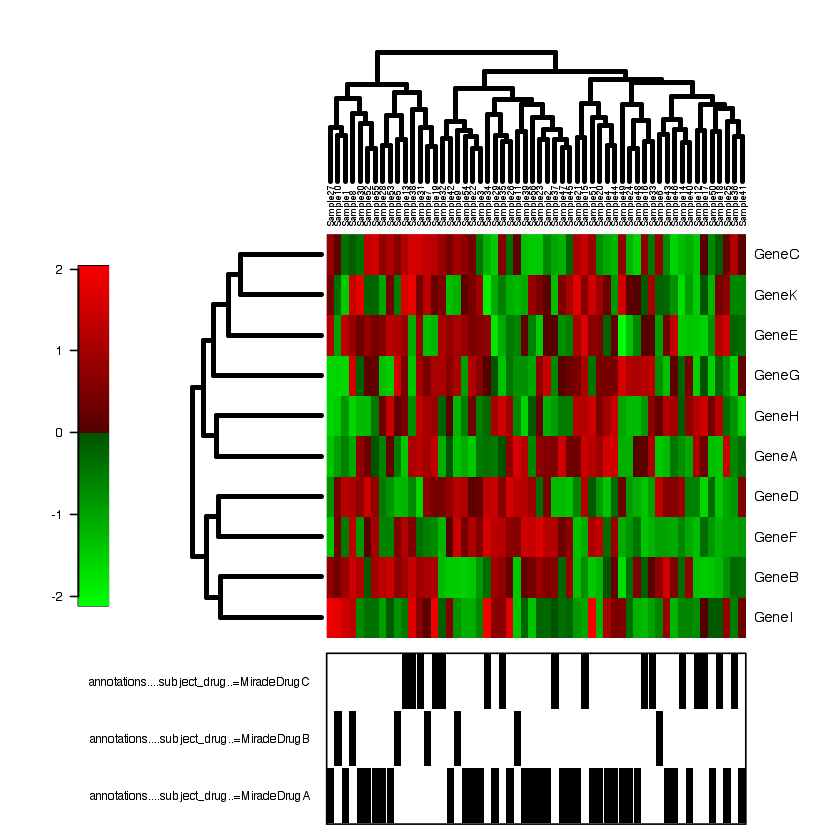

In [15]:
library(Heatplus)

# Test annHeatmap2 with column annotations
testAnnHeatmap2<-function(logCPM, annotations){
    ann.dat = data.frame(annotations[,"subject_drug"])

    plot(annHeatmap2(logCPM, legend=2,
        ann = list(Col = list(data = ann.dat))))
}

testAnnHeatmap2(gLogCpmData, gAnnotationData)

Like [heatmap3](#heatmap3), annHeatmap2 does metadata annotations as a mini-graph; apparently it *doesn't* do such annotations as color bars?  It requires that all annotation (and dendrogram, etc) options be passed in as lists, which clearly offers a lot of powerful abilities but is sort of heavy-weight.

[Table of Contents](#table-of-contents)

<a name = "summary"></a>

## Summary

Below I summarize the features I assessed for these tools:

| feature | heatmap | heatmap.2 | aheatmap | pheatmap | heatmap3 | annHeatmap2 |
|-|-|-|-|-|-|-|
| source | built-in | cran | cran | cran | cran | bioconductor |
| can add main legend | | x | x | x | x | x |
| can control main legend text|  | x | | | x | |
| can add row/col annotations | x | x | x | x | x | x |
| can specify annotations as table column | | | x | x | | x |
| can add annotation legend | | | x | x | x | ~ |
| can control annotation legend text | | | | ~ | x | ~ |
| notes | no clear advantages | pretty nice results with little tinkering | Appears **UNUSABLE** as dendrograms show up wrong, at least in notebook | pretty nice results with little tinkering | powerful but complicated | powerful but complicated; doesn't support ColSideColors? |

[Table of Contents](#table-of-contents)

<a name = "recommendation"></a>

## Recommendation

I recommend using **heatmap.2** if you want *simple and easy*, and **heatmap3** if you want more *fine-grained control*. Since they both use the same interface, it should be easy to migrate from the first to the second if you discover you need a more complex solution.

[Table of Contents](#table-of-contents)